## Main code for Dynamic Mode Decomposition with the entire dataset

In [1]:
import logging
import config
import data_loader
import data_processor
import simulation
import matplotlib.pyplot as plt
import warnings
from plotter import Plotter

# Warning on TecplotDataloader can be ignored for this simulation

Refer to the installation instructions at https://github.com/FlowModelingControl/flowtorch
If you are not using the TecplotDataloader, ignore this warning.


In [2]:
# Logger configuration
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
logger = logging.getLogger(__name__)

In [3]:
%%capture
# Magic word to block other irrelevant warnings 

# Loading and processing of data
times, pts, loader = data_loader.load_data()
mask, t_steps, dt, data_matrix = data_processor.process_data()

In [4]:
%%capture

# Implementation of the DMD algorithm and storing of results
opt_rank, eig_val, eig_vec, phi, dynamics, reconstruction, mse = simulation.run_DMD()

The rank of matrix A is: 240

Computing Singular Value Decomposition of data matrix X...

The optimal rank to keep 99.5% of the singular values contribution is 18
We discarded the 222 smallest singular values

Proceeding with Dynamic Mode Decomposition, seek of DMD modes...

18 modes have been collected.

Frequency of mode 0 is 0.0 Hz
Frequency of mode 1 is 3.0 Hz
Frequency of mode 2 is -3.0 Hz
Frequency of mode 3 is 6.0 Hz
Frequency of mode 4 is -6.0 Hz
Frequency of mode 5 is 9.01 Hz
Frequency of mode 6 is -9.01 Hz
Frequency of mode 7 is 12.01 Hz
Frequency of mode 8 is -12.01 Hz
Frequency of mode 9 is 15.01 Hz
Frequency of mode 10 is -15.01 Hz
Frequency of mode 11 is 15.97 Hz
Frequency of mode 12 is -15.97 Hz
Frequency of mode 13 is 18.01 Hz
Frequency of mode 14 is 18.98 Hz
Frequency of mode 15 is -18.98 Hz
Frequency of mode 16 is -18.01 Hz
Frequency of mode 17 is 20.0 Hz

Reconstructing data through DMD modes and computing the error...

Reconstruction completed. 



Plotting points of the grid...


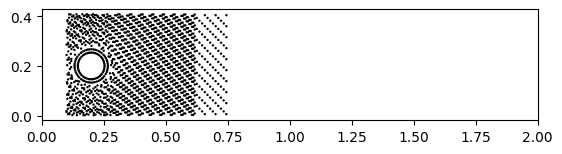

In [5]:
# Creation of the Plotter object and visualization of grid points
plot = Plotter(pts, mask)

logger.info("Plotting points of the grid...")

plot.scatter_plot()

Plotting map of vorticities...


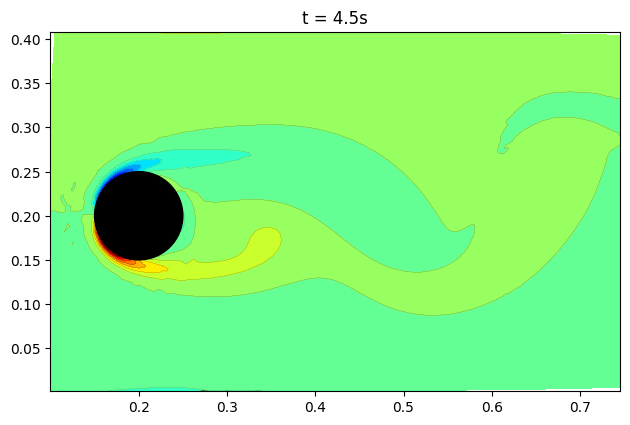

In [6]:
# Plot of the map of vorticities for the given time step
logger.info("Plotting map of vorticities...")

time_idx = 20
fig, ax = plt.subplots()

try:
    plot.plot_data(ax, data_matrix[:, time_idx].real, f"t = {t_steps[time_idx]}s")
except IndexError:
    logger.error(f"Index {time_idx} out of range. Select an index between 0 and {data_matrix.size(1) - 1}.")

Plotting found DMD modes...


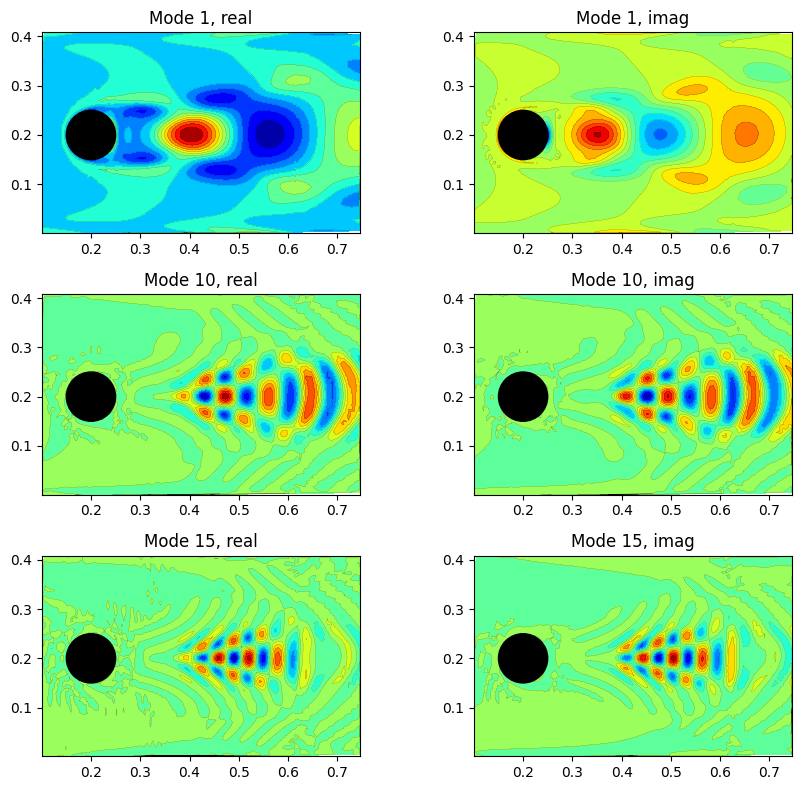

In [7]:
# Plot of the selected DMD modes
logger.info("Plotting found DMD modes...")

mode_indices = [1, 10, 15]

try:
    plot.plot_DMD_modes(phi, mode_indices)
except IndexError:
    logger.error(f"One or more indices are out of range. Select an index between 0 and {phi.size(1) - 1}.")

Plotting DMD dynamics...


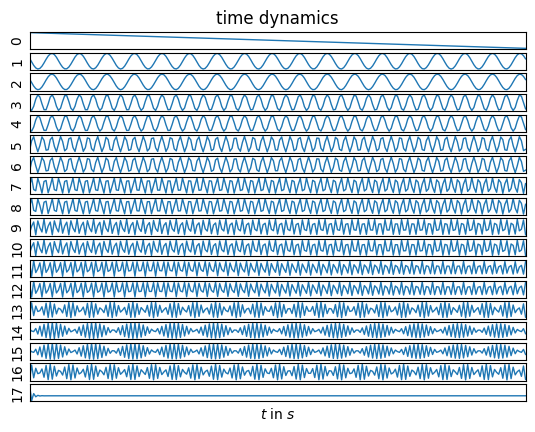

In [8]:
# Plot of DMD modes time evolution
logger.info("Plotting DMD dynamics...")

plot.time_dynamics(opt_rank, dynamics, t_steps)

Plotting data reconstruction...


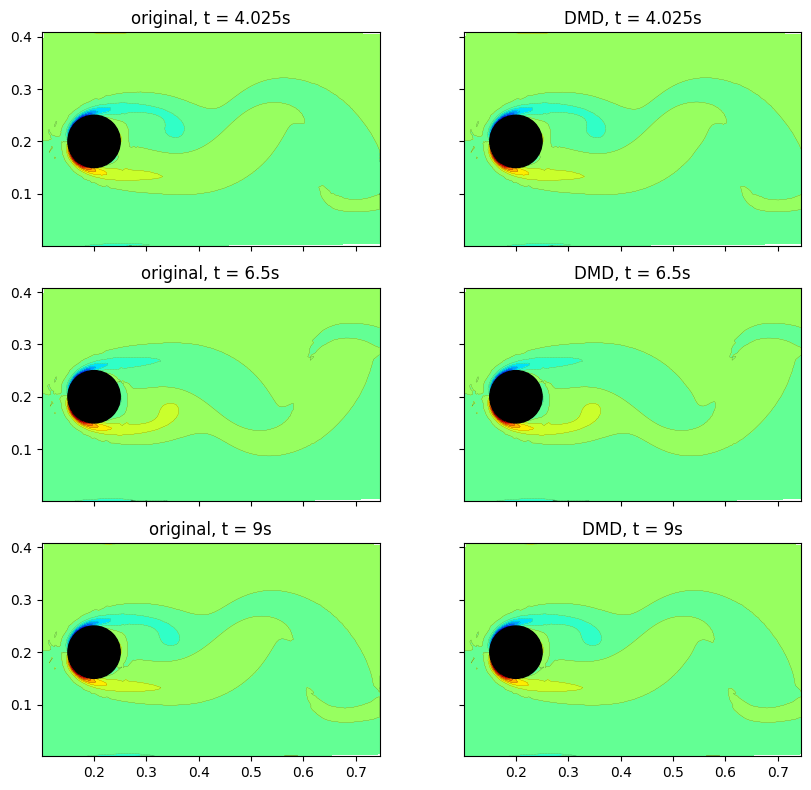

In [9]:
# Plotting original data reconstruction using DMD modes
logger.info("Plotting data reconstruction...")

time_idx_reconstruction = [1,100,200]

try:
    plot.data_reconstruction(data_matrix.real, reconstruction.real, time_idx_reconstruction, t_steps)    
except IndexError:
    logger.error(f"One or more indices are out of range. Select indices between 0 and {data_matrix.size(1) - 1}.")

Plotting error trend in data reconstruction...


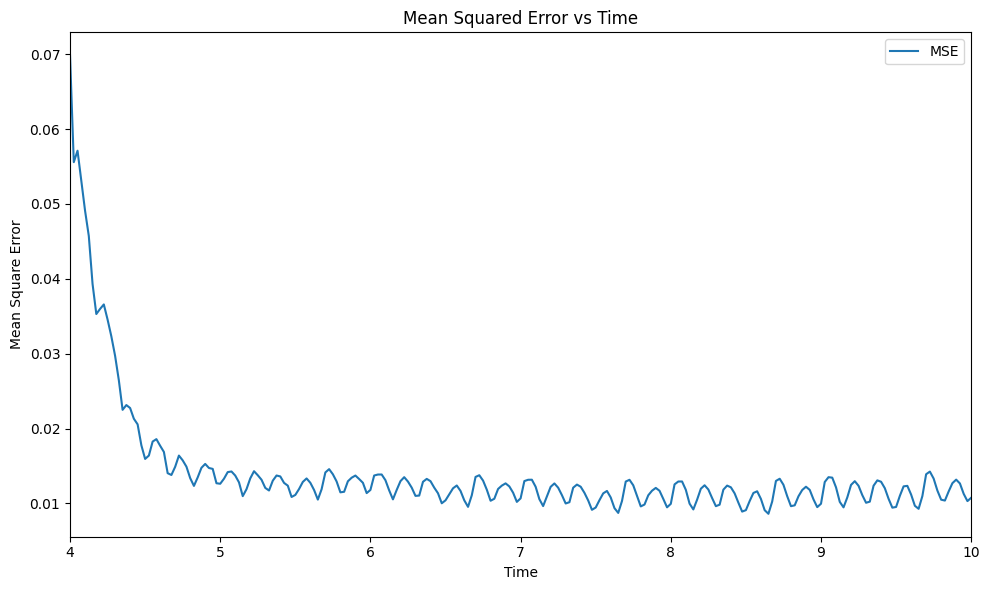

In [10]:
# Plotting error in data reconstruction to assess quality of approximation
logger.info("Plotting error trend in data reconstruction...")

plot.reconstruction_error(t_steps, mse)